### Bagging Ensemble Learning

![Bagging](https://media.licdn.com/dms/image/D5612AQGa-4qWkuV1yQ/article-inline_image-shrink_1000_1488/0/1692986483389?e=1716422400&v=beta&t=MF4mK0uBzkW_kW4o9Kx_cyjzKSJF5VzUEAmY4q-iOw8)

The core idea behind Bagging (Bootstrap Aggregating) ensemble method is to combine the predictions of multiple base learners to improve the overall performance of the model. 

Here's how it works:

1. **Bootstrap Sampling**: Multiple subsets of the original dataset are created by randomly sampling with replacement. Each subset is of the same size as the original dataset.

2. **Base Learner Training**: A base learning algorithm (e.g., decision trees, neural networks, etc.) is trained on each bootstrap sample independently. This means that each base learner is exposed to slightly different variations of the original dataset.

3. **Aggregation**: Once all base learners are trained, their predictions are aggregated. For classification, this could be done by majority voting (the most common class predicted by the base learners), while for regression, it could be averaging their predictions.

By combining the predictions of multiple models trained on different subsets of the data, Bagging reduces variance and helps to improve the overall generalization performance of the ensemble model. It is particularly effective when the base learners are unstable and tend to overfit the training data. Bagging helps to mitigate this by introducing randomness in the training process.

### Bias-Variance Trade-off

The bias-variance trade-off is a fundamental concept in machine learning and statistical modeling, including ensemble methods like Bagging. It refers to the balance between two sources of error that affect the predictive performance of a model: bias and variance.

1. **Bias**: Bias refers to the error introduced by the simplifying assumptions made by a model to approximate the underlying data. High bias models are overly simplistic and may fail to capture the true relationships in the data, leading to underfitting. Models with high bias tend to have low complexity and may not be able to represent the underlying patterns in the data.

2. **Variance**: Variance refers to the error introduced by the model's sensitivity to fluctuations in the training data. High variance models are highly flexible and can capture complex patterns in the training data, sometimes even capturing noise. However, they may not generalize well to unseen data, leading to overfitting. Models with high variance tend to have high complexity and can be overly sensitive to small changes in the training data.

The bias-variance trade-off arises because reducing one source of error often leads to an increase in the other. For example:

- Increasing the complexity of a model typically reduces bias but increases variance.
- Decreasing the complexity of a model typically reduces variance but increases bias.

Ensemble methods like Bagging address the bias-variance trade-off by reducing the variance component. By training multiple models on different subsets of the data and aggregating their predictions, Bagging effectively reduces the variance of the ensemble model. Each base learner in the ensemble may have high variance individually, but when combined, their predictions tend to cancel out some of the errors, leading to a more stable and robust model.

Overall, the goal is to find the right balance between bias and variance to achieve a model that generalizes well to unseen data. Ensemble methods like Bagging are valuable tools in achieving this balance by reducing the variance component without significantly increasing bias.ificantly increasing bias.

### When to use Bagging

Bagging (Bootstrap Aggregating) is a powerful ensemble learning technique that can be effective in various scenarios. Here are some situations where using Bagging could be beneficial:

1. **High Variance Models**: When individual models in the ensemble tend to overfit the training data due to high variance, Bagging can help to reduce this variance by averaging the predictions of multiple models trained on different subsets of the data. This makes Bagging particularly useful for complex models like decision trees or neural networks.

2. **Unstable Models**: Some learning algorithms are sensitive to small changes in the training data, leading to instability in their predictions. Bagging can stabilize such models by training them on different bootstrap samples, thus reducing the variability in their predictions.

3. **Large Datasets**: Bagging can also be advantageous when dealing with large datasets. By sampling subsets of the data with replacement, Bagging allows for more efficient training of models on smaller subsets, which can be computationally less intensive compared to training on the entire dataset.

4. **Imbalanced Datasets**: In cases where the dataset is imbalanced, meaning one class is significantly more prevalent than others, Bagging can help to improve the performance of the model by providing a more balanced representation of the classes in each bootstrap sample.

5. **Improving Generalization**: Bagging tends to improve the generalization performance of the ensemble model by reducing overfitting. It achieves this by combining multiple models trained on different subsets of the data, resulting in a more robust and stable prediction.

6. **Classification and Regression Problems**: Bagging can be applied to both classification and regression problems. In classification, it typically involves aggregating the predictions of base classifiers through majority voting, while in regression, it involves averaging the predictions of base regressors.

Overall, Bagging is a versatile ensemble method that can be applied in various machine learning tasks to improve model performance, especially when dealing with complex models, unstable algorithms, or large datasets.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encodeer = LabelEncoder()

df['Species'] = encodeer.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['Species'].unique()

array([0, 1, 2])

In [9]:
# To make the problem hard we are choosing 'Species' = Versicolor(1), Virginica(2) and  choosing SepalWidthCm and PetalLengthCm columns

df = df[df['Species'] != 0] [['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [10]:
df.sample(5)

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
148,3.4,5.4,2
142,2.7,5.1,2
76,2.8,4.8,1
114,2.8,5.1,2


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

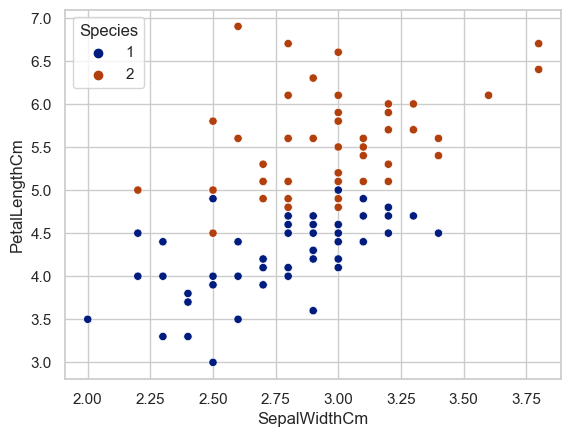

In [12]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x = df['SepalWidthCm'], y = df['PetalLengthCm'], hue= df['Species'], palette='dark')
plt.show()

In [13]:
# Taking only 10 rows for Training

df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80 :, :].sample(5)

In [14]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
108,2.5,5.8,2
55,2.8,4.5,1
64,2.9,3.6,1
144,3.3,5.7,2


In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
57,2.4,3.3,1
131,3.8,6.4,2
74,2.9,4.3,1
123,2.7,4.9,2
82,2.7,3.9,1
139,3.1,5.4,2
62,2.2,4.0,1
88,3.0,4.1,1
108,2.5,5.8,2


In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
130,2.8,6.1,2
114,2.8,5.1,2
60,2.0,3.5,1
105,3.0,6.6,2


In [17]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
129,3.0,5.8,2
125,3.2,6.0,2
56,3.3,4.7,1
67,2.7,4.1,1


In [18]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

### Bagging

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [20]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [21]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
123,2.7,4.9,2
62,2.2,4.0,1
57,2.4,3.3,1
88,3.0,4.1,1
139,3.1,5.4,2
139,3.1,5.4,2
123,2.7,4.9,2


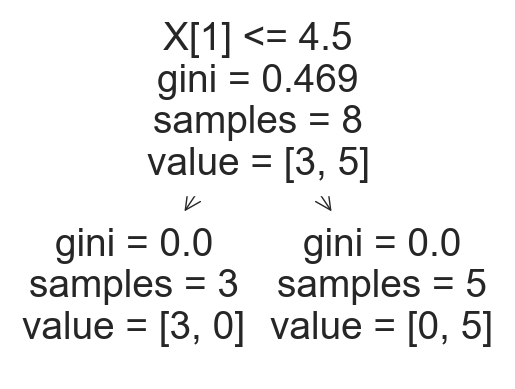

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


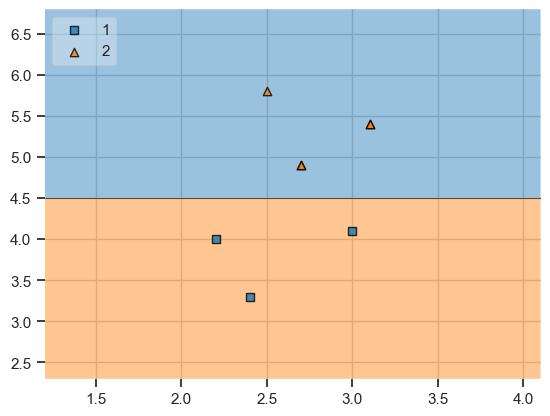

In [22]:
dt_bag1 = DecisionTreeClassifier()

evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
82,2.7,3.9,1
82,2.7,3.9,1
139,3.1,5.4,2
131,3.8,6.4,2
135,3.0,6.1,2
108,2.5,5.8,2
82,2.7,3.9,1


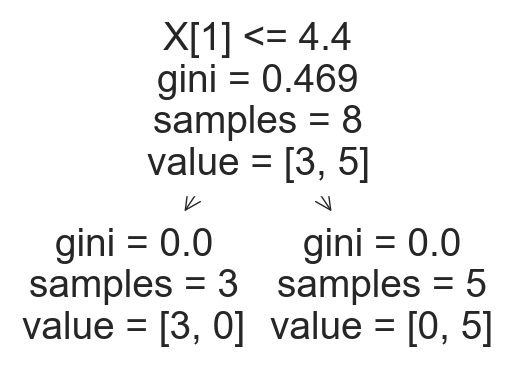

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


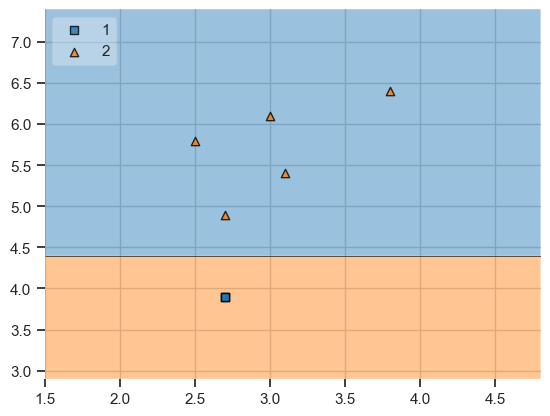

In [24]:
dt_bag2 = DecisionTreeClassifier()

evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
88,3.0,4.1,1
62,2.2,4.0,1
131,3.8,6.4,2
88,3.0,4.1,1
123,2.7,4.9,2
74,2.9,4.3,1
74,2.9,4.3,1


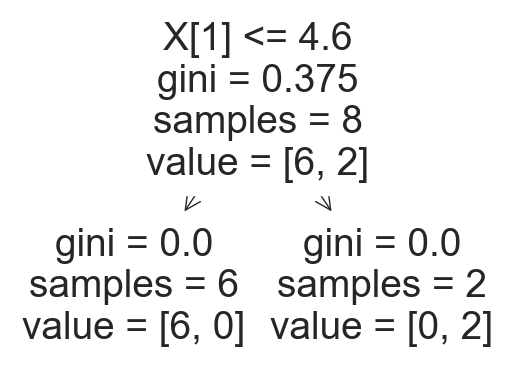

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


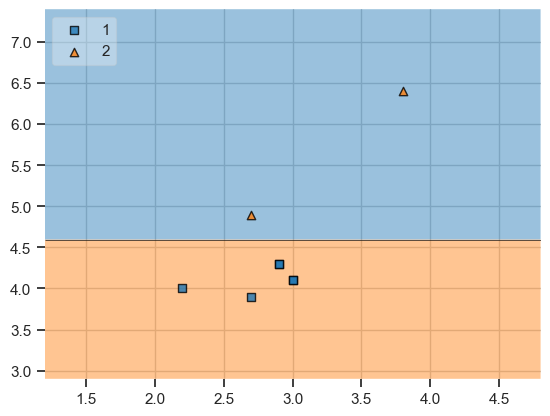

In [26]:
dt_bag3 = DecisionTreeClassifier()

evaluate(dt_bag3, X, y)

#### Predict

In [27]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
129,3.0,5.8,2
125,3.2,6.0,2
56,3.3,4.7,1
67,2.7,4.1,1


In [30]:
print("Predictor 1",dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.4,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.4,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
dt_bag1.predict(df_test[['SepalWidthCm', 'PetalLengthCm']])

array([2, 2, 2, 2, 1])

Pasting, Random Subspaces, and Random Patches are all ensemble methods that are similar to Bagging in that they involve training multiple base learners on different subsets of the data and then combining their predictions. However, they differ in how they sample the data and features for training each base learner.

1. **Pasting**:
   - In Pasting, multiple subsets of the training data (rows) are sampled without replacement.
   - Each base learner is trained on a different subset of the data, and the final prediction is obtained by averaging (in regression) or voting (in classification) the predictions of all base learners.
   - Pasting is useful when the dataset is large and diverse, and sampling without replacement helps to ensure that each subset of data used for training is unique.

2. **Random Subspaces**:
   - In Random Subspaces, each base learner is trained on a random subset of the features (colums) of the dataset.
   - This means that the samples drawn for training each base learner are the same, but only a subset of features is used for training.
   - Random Subspaces are useful when dealing with high-dimensional datasets, as it helps to reduce the dimensionality of the problem and decorrelate the base learners, leading to improved generalization performance.

3. **Random Patches**:
   - Random Patches combines the ideas of Pasting and Random Subspaces by sampling both data and features.
   - Each base learner is trained on a random subset of both the training instances and the features.
   - This technique is particularly useful when dealing with very high-dimensional datasets, where both the number of instances and the number of features are large.
   - Random Patches can help to reduce overfitting by introducing randomness in both the data and feature dimensions.

In summary, while Bagging (Bootstrap Aggregating) involves sampling with replacement from the dataset, Pasting samples without replacement, Random Subspaces samples only a subset of features, and Random Patches samples both data and features. These techniques are all variations of ensemble methods that aim to reduce overfitting and improve the generalization performance of machine learning models.

In [31]:
# Pasting Row sampling without replacement
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
57,2.4,3.3,1
139,3.1,5.4,2
62,2.2,4.0,1
82,2.7,3.9,1
88,3.0,4.1,1
131,3.8,6.4,2
74,2.9,4.3,1


In [34]:
#Random Subspaces
#random subset of the features (colums) of the dataset
df1 = pd.read_csv('Iris.csv')
df1 = df1.iloc[:, 1:]

In [35]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
#Column Sampling
df1.sample(2, replace=True, axis=1)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [39]:
#Random Patches
#sampling both data(rows) and features(columns)
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,SepalLengthCm
66,3.0,5.6
49,3.3,5.0
33,4.2,5.5
71,2.8,6.1
46,3.8,5.1
114,2.8,5.8
71,2.8,6.1
26,3.4,5.0
